In [1]:
import numbers

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('data.xlsx', sheet_name = 'Lab 1 - Web Intelligence Public')
data.head(5)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Vithya G., Naren J., Vikas Reddy K., Raghunand...",49362399800;55671230800;57214314483;57214315455;,A study on web intelligence for the internet o...,2020,International Journal of Psychosocial Rehabili...,23,1,NaN,394,399,...,NaN,NaN,NaN,English,Int. J. Psychosoc. Rehab.,Article,Final,NaN,Scopus,2-s2.0-85078623770
1,"Lin S., Gao J., Zhang S., He X., Sheng Y., Che...",57191409679;57209472530;57209473974;5643781620...,A continuous learning method for recognizing n...,2020,World Wide Web,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,World Wide Web,Article,Article in Press,NaN,Scopus,2-s2.0-85079717044
2,[No author name available],[No author id available],Proceedings - 2019 IEEE/WIC/ACM International ...,2019,Proceedings - 2019 IEEE/WIC/ACM International ...,NaN,NaN,NaN,NaN,NaN,...,9781450369343,NaN,NaN,English,"Proc. - IEEE/WIC/ACM Int. Conf. Web Intell., WI",Conference Review,Final,NaN,Scopus,2-s2.0-85074789229
3,[No author name available],[No author id available],Proceedings - 2019 IEEE/WIC/ACM International ...,2019,Proceedings - 2019 IEEE/WIC/ACM International ...,NaN,NaN,NaN,NaN,NaN,...,9781450369886,NaN,NaN,English,Proc. - IEEE/WIC/ACM Int. Conf. Web Intell. Wo...,Conference Review,Final,NaN,Scopus,2-s2.0-85074320724
4,"Liu H., Ning H., Mu Q., Zheng Y., Zeng J., Yan...",56872078600;9232973200;57187872300;57187332300...,A review of the smart world,2019,Future Generation Computer Systems,96,NaN,NaN,678,691,...,NaN,FGCSE,NaN,English,Future Gener Comput Syst,Article,Final,NaN,Scopus,2-s2.0-85029474758


In [3]:
data = data[data['Year'].between(2000 ,2006 ,inclusive = True)]
data['Year'].unique()

array([2006, 2005, 2004, 2003, 2002, 2001, 2000], dtype=int64)

In [4]:
data.nunique()

Authors                          113
Author(s) ID                     112
Title                            157
Year                               7
Source title                      73
Volume                            63
Issue                             20
Art. No.                          25
Page start                       120
Page end                         123
Page count                        16
Cited by                          36
DOI                               69
Link                             160
Affiliations                     127
Authors with affiliations        133
Abstract                         149
Author Keywords                   54
Index Keywords                   134
Correspondence Address           111
Editors                           28
Publisher                          8
ISSN                              44
ISBN                              50
CODEN                             23
PubMed ID                          0
Language of Original Document      2
A

In [5]:
data = data[['Authors', 'Title', 'Year', 'Page start', 'Page end', 'Page count', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Correspondence Address',
       'Language of Original Document',
       'Document Type']]
data.head(3)

,Authors,Title,Year,Page start,Page end,Page count,Abstract,Author Keywords,Index Keywords,Correspondence Address,Language of Original Document,Document Type
644,Kacprzyk J.,"Web intelligence, business intelligence and de...",2006,3,NaN,NaN,We present first some general remarks on chall...,NaN,Administrative data processing; Artificial int...,"Kacprzyk, J.; Systems Research Institute, Poli...",English,Conference Paper
645,"Zuccala A., Thelwall M.",LexiURL Web link analysis for digital libraries,2006,371,NaN,NaN,The purpose of this demonstration is to show h...,Digital libraries; Web link analysis,Artificial intelligence; Digital libraries; Te...,"Zuccala, A.; Statistical Cybermetrics Research...",English,Conference Paper
646,[No author name available],Proceedings - 30th Annual International Comput...,2006,NaN,NaN,943.0,The proceeding contains 138 papers. The topics...,NaN,Algorithms; Data mining; Data structures; Faul...,NaN,English,Conference Review


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 644 to 803
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        160 non-null    object 
 1   Title                          160 non-null    object 
 2   Year                           160 non-null    int64  
 3   Page start                     142 non-null    object 
 4   Page end                       130 non-null    object 
 5   Page count                     18 non-null     float64
 6   Abstract                       160 non-null    object 
 7   Author Keywords                54 non-null     object 
 8   Index Keywords                 135 non-null    object 
 9   Correspondence Address         121 non-null    object 
 10  Language of Original Document  160 non-null    object 
 11  Document Type                  160 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage

In [7]:
data.describe()

,Year,Page count
count,160.000000,18.000000
mean,2004.162500,722.833333
std,1.340644,417.235474
min,2000.000000,12.000000
25%,2003.000000,507.250000
50%,2004.000000,730.000000
75%,2005.000000,914.750000
max,2006.000000,1488.000000


In [8]:
def unify_pages(cols):
    start = cols[0]
    end = cols[1]
    total = cols[2]
    if not pd.isnull(total) and isinstance(total, numbers.Number):
        return total
    elif not pd.isnull(start) and not pd.isnull(end) and isinstance(start, numbers.Number) and isinstance(end, numbers.Number):
        return end - start
    else:
        return None

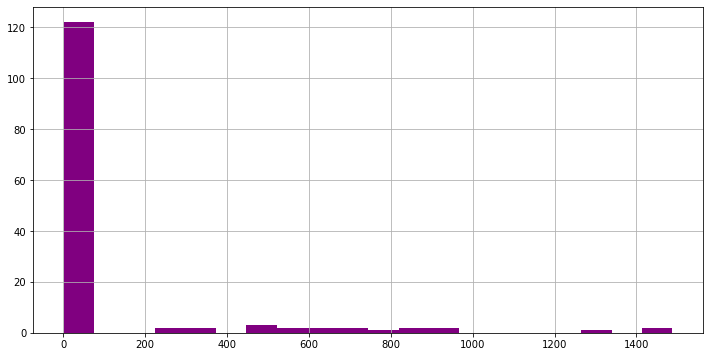

In [9]:
page_amounts = data[['Page start', 'Page end', 'Page count']].apply(unify_pages,axis=1).dropna()
page_amounts.hist(color='purple',bins=20,figsize=(12,6))

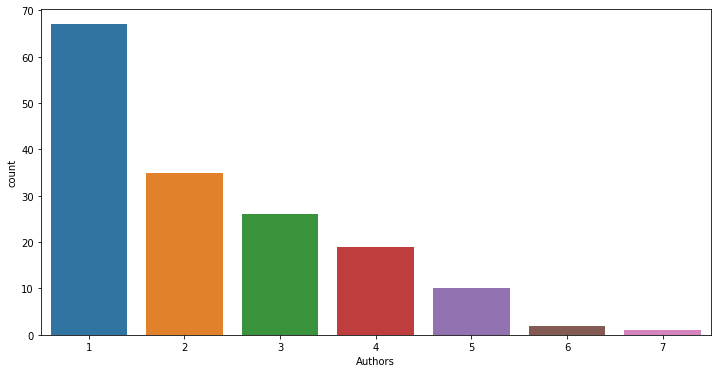

In [10]:
authors = data['Authors'].apply(lambda x: len(x.split(',')))

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(authors,ax=ax)

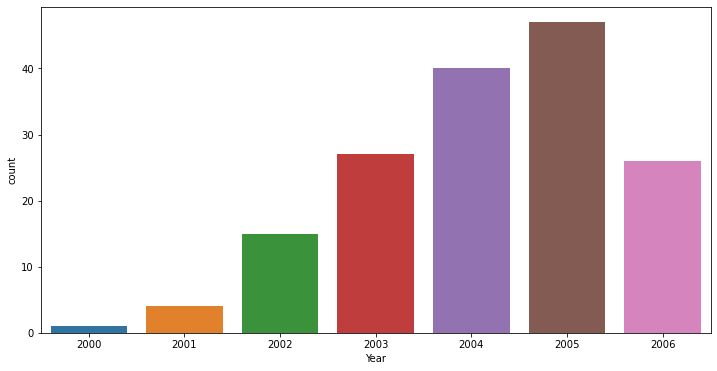

In [11]:
years = data.groupby('Year').count()['Authors']

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Year',data=data,ax=ax)

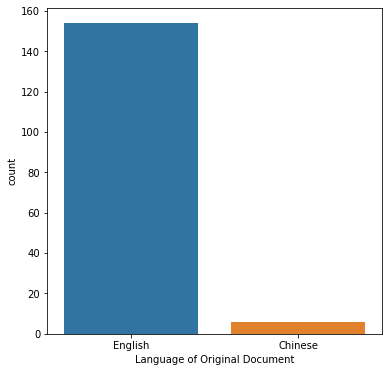

In [12]:
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Language of Original Document',data=data,ax=ax)

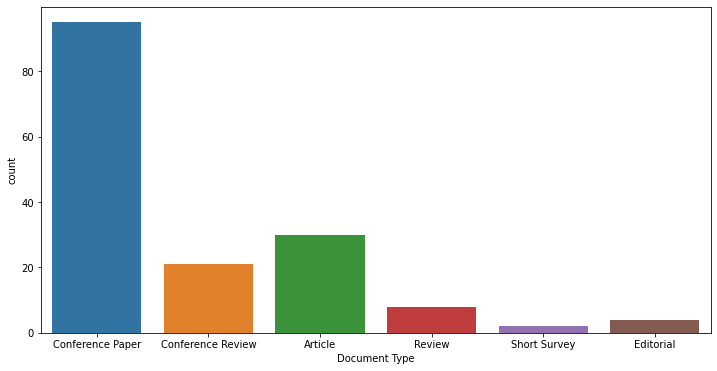

In [13]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='Document Type',ax=ax)

In [14]:
data.drop(['Page start', 'Page end', 'Page count'], axis = 1, inplace=True) 

In [15]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [16]:
import pycountry

def get_country(adress):
    for country in list(pycountry.countries):
        if country.name in adress:
            return [country.name,country.alpha_3]
    return None
        
    

country_list = [item.name for item in list(pycountry.countries)]
countries = data['Correspondence Address'].dropna().apply(lambda x: get_country(x))
country_count = countries.value_counts()
countries_names = [x[0] for x in country_count.index]
countries_codes = [x[1] for x in country_count.index]
countries_counts = list(country_count.values)

In [48]:
map_data = dict(
        type = 'choropleth',
        locations = countries_codes,
        z = countries_counts,
        text = countries_names,
        colorscale = 'viridis_r',
        colorbar = {'title' : 'No. of authors from country'},
      ) 

layout = dict(
    title = 'Origin countries of articles authors',
    geo = dict(
        showframe = False,
    )
)

In [49]:
choromap = go.Figure(data = [map_data],layout = layout)
iplot(choromap)

In [47]:
plot(choromap, filename = 'authors_map.html', auto_open=False)

'authors_map.html'

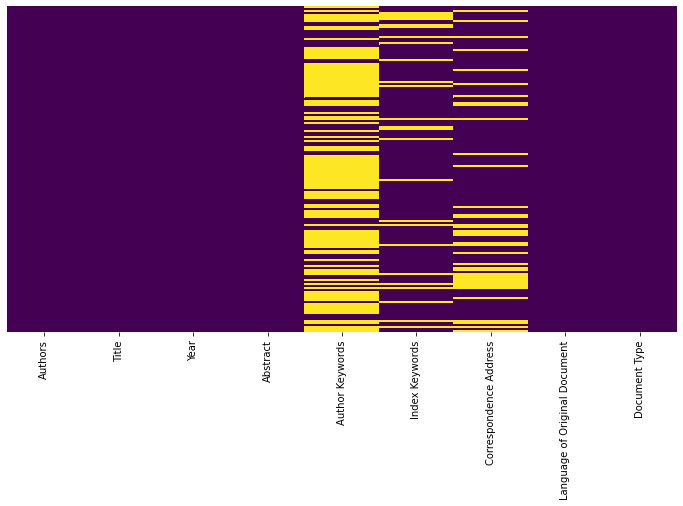

In [19]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [20]:
from nltk.tokenize import sent_tokenize

import nltk

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

nltk.download('punkt')
#import tqdm
#tqdm.notebook.tqdm.pandas()

data['sentences'] = data.Abstract.progress_map(sent_tokenize)
data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

<ipython-input-20-6b5d871efd86>:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



c:\dev\web-intelligence-project\venv\lib\site-packages\tqdm\std.py:666: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version

[nltk_data] Downloading package punkt to C:\Users\Maksymilian
[nltk_data]     Operlejn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['We present first some general remarks on challenges faced by modern information technology, notably when a human being is a relevant factor.',
 'These challenges are mainly related to inherent difficulties in solving some "meta-problems", in particular broadly perceived decision making.',
 'We assume, on the one hand, business intelligence related perspective, augmented with elements of Web intelligence, to fully use all available tools and resources.']

In [21]:
from nltk.tokenize import word_tokenize

data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])


[['We', 'present', 'first', 'some', 'general', 'remarks', 'on', 'challenges', 'faced', 'by', 'modern', 'information', 'technology', ',', 'notably', 'when', 'a', 'human', 'being', 'is', 'a', 'relevant', 'factor', '.'], ['These', 'challenges', 'are', 'mainly', 'related', 'to', 'inherent', 'difficulties', 'in', 'solving', 'some', '``', 'meta-problems', "''", ',', 'in', 'particular', 'broadly', 'perceived', 'decision', 'making', '.'], ['We', 'assume', ',', 'on', 'the', 'one', 'hand', ',', 'business', 'intelligence', 'related', 'perspective', ',', 'augmented', 'with', 'elements', 'of', 'Web', 'intelligence', ',', 'to', 'fully', 'use', 'all', 'available', 'tools', 'and', 'resources', '.']]


In [22]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maksymilian
[nltk_data]     Operlejn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



[[('We', 'PRP'), ('present', 'VBP'), ('first', 'RB'), ('some', 'DT'), ('general', 'JJ'), ('remarks', 'NNS'), ('on', 'IN'), ('challenges', 'NNS'), ('faced', 'VBN'), ('by', 'IN'), ('modern', 'JJ'), ('information', 'NN'), ('technology', 'NN'), (',', ','), ('notably', 'RB'), ('when', 'WRB'), ('a', 'DT'), ('human', 'JJ'), ('being', 'VBG'), ('is', 'VBZ'), ('a', 'DT'), ('relevant', 'JJ'), ('factor', 'NN'), ('.', '.')], [('These', 'DT'), ('challenges', 'NNS'), ('are', 'VBP'), ('mainly', 'RB'), ('related', 'VBN'), ('to', 'TO'), ('inherent', 'JJ'), ('difficulties', 'NNS'), ('in', 'IN'), ('solving', 'VBG'), ('some', 'DT'), ('``', '``'), ('meta-problems', 'JJ'), ("''", "''"), (',', ','), ('in', 'IN'), ('particular', 'JJ'), ('broadly', 'RB'), ('perceived', 'JJ'), ('decision', 'NN'), ('making', 'NN'), ('.', '.')], [('We', 'PRP'), ('assume', 'VBP'), (',', ','), ('on', 'IN'), ('the', 'DT'), ('one', 'CD'), ('hand', 'NN'), (',', ','), ('business', 'NN'), ('intelligence', 'NN'), ('related', 'VBN'), ('pe

In [23]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
nltk.download('wordnet')

# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)
data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[nltk_data] Downloading package wordnet to C:\Users\Maksymilian
[nltk_data]     Operlejn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['We',
  'present',
  'first',
  'some',
  'general',
  'remark',
  'on',
  'challenge',
  'face',
  'by',
  'modern',
  'information',
  'technology',
  ',',
  'notably',
  'when',
  'a',
  'human',
  'be',
  'be',
  'a',
  'relevant',
  'factor',
  '.'],
 ['These',
  'challenge',
  'be',
  'mainly',
  'relate',
  'to',
  'inherent',
  'difficulty',
  'in',
  'solve',
  'some',
  '``',
  'meta-problems',
  "''",
  ',',
  'in',
  'particular',
  'broadly',
  'perceived',
  'decision',
  'making',
  '.'],
 ['We',
  'assume',
  ',',
  'on',
  'the',
  'one',
  'hand',
  ',',
  'business',
  'intelligence',
  'relate',
  'perspective',
  ',',
  'augment',
  'with',
  'element',
  'of',
  'Web',
  'intelligence',
  ',',
  'to',
  'fully',
  'use',
  'all',
  'available',
  'tool',
  'and',
  'resource',
  '.']]

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

[nltk_data] Downloading package stopwords to C:\Users\Maksymilian
[nltk_data]     Operlejn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [27]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])
data['tokens'].head(1).tolist()[0][:30]

['present',
 'first',
 'general',
 'remark',
 'challenge',
 'face',
 'modern',
 'information',
 'technology',
 'notably',
 'human',
 'relevant',
 'factor',
 'challenge',
 'mainly',
 'relate',
 'inherent',
 'difficulty',
 'solve',
 'particular',
 'broadly',
 'perceived',
 'decision',
 'making',
 'assume',
 'hand',
 'business',
 'intelligence',
 'relate',
 'perspective']

In [28]:
from gensim.models import Phrases

tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

from gensim import corpora

dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

from gensim import models

np.random.seed(123456)
num_topics = 7
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

unable to import 'smart_open.gcs', disabling that module


Wall time: 1.78 s


In [29]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.043*"web" + 0.023*"data" + 0.016*"model" + 0.015*"web_intelligence" + 0.015*"information" + 0.012*"tool" + 0.012*"system" + 0.011*"berlin_heidelberg" + 0.011*"provide" + 0.009*"user" + 0.009*"customer" + 0.009*"design" + 0.009*"present" + 0.009*"personalization" + 0.008*"web_intelligence_wi" + 0.008*"technology" + 0.008*"application" + 0.008*"various" + 0.008*"propose" + 0.007*"analysis"

1: 0.028*"web" + 0.027*"information" + 0.023*"system" + 0.016*"approach" + 0.015*"user" + 0.012*"application" + 0.011*"network" + 0.011*"web_intelligence" + 0.009*"base" + 0.009*"learn" + 0.008*"new" + 0.008*"structure" + 0.008*"agent" + 0.008*"discuss" + 0.007*"information_retrieval" + 0.007*"internet" + 0.007*"technology" + 0.007*"problem" + 0.007*"knowledge" + 0.007*"intelligent"

2: 0.019*"system" + 0.018*"information" + 0.017*"web_intelligence" + 0.016*"technique" + 0.015*"capability" + 0.014*"internet" + 0.014*"agent" + 0.014*"performance" + 0.012*"research" + 0.011*"cluster" + 0.010*"issue

In [30]:
#print(data.Abstract.loc[0][:500])

In [31]:
lda_model[corpus[0]]

[(0, 0.35258225), (4, 0.64692783)]

In [32]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [33]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [34]:
document_topic.head()

,0,1,2,3,4,5,6
0,0.352578,0.0,0.0,0.000000,0.646932,0.0,0.000000
1,0.000000,0.0,0.0,0.991513,0.000000,0.0,0.000000
2,0.992565,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.999179,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.943924


In [35]:
# Which document are about topic 14
document_topic.sort_values(3, ascending=False)[3].head(20)

3      0.999179
147    0.999156
151    0.999049
10     0.998930
99     0.998802
101    0.998539
32     0.998464
91     0.998424
140    0.998424
135    0.998186
89     0.997936
129    0.997607
132    0.997010
63     0.997010
1      0.991513
137    0.601268
82     0.508251
31     0.507494
68     0.414802
83     0.386634
Name: 3, dtype: float64

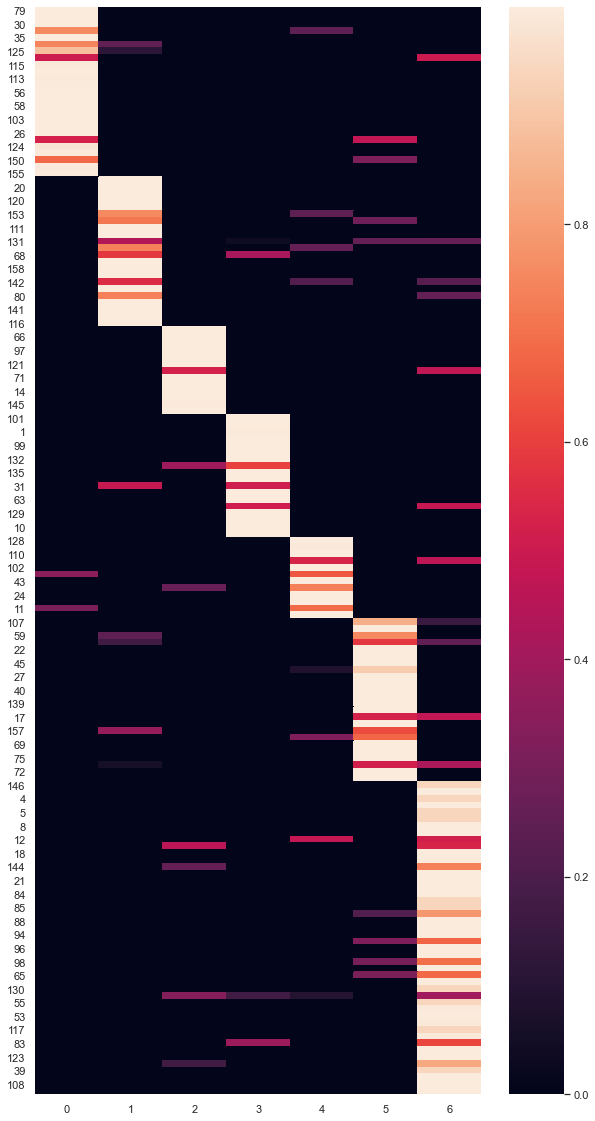

In [36]:
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

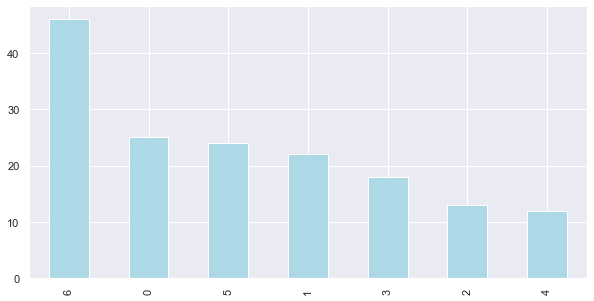

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [38]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [42]:
pyLDAvis.save_html(vis, 'lda.html')